# Dual Model Integration -
This notebook demonstrates the integration of the unified CNN model and screenrecognition model.


In [1]:
import os
import sys
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image, ImageDraw
import json
import traceback

# Add project root to path
project_root = os.path.dirname(os.path.dirname(os.path.abspath('__file__')))
sys.path.append(project_root)

# Fixed imports
from config.config import Config
from src.inference_engine import SmartDualInference, InputType

# Initialize configuration
config = Config()
print("🚀 Enhanced Dual Model Integration System")
print(f"Project root: {project_root}")
print(f"Model directory: {config.MODEL_DIR}")
print(f"Unified model path: {config.UNIFIED_MODEL_PATH}")
print(f"Screenrec model path: {config.SCREENREC_MODEL_PATH}")

# Ensure directories exist
os.makedirs(config.MODEL_DIR, exist_ok=True)
sample_images_dir = os.path.join(project_root, "examples", "sample_images")
os.makedirs(sample_images_dir, exist_ok=True)
print(f"Sample images directory: {sample_images_dir}")


🚀 Enhanced Dual Model Integration System
Project root: c:\Users\NACHIKET\Desktop\SketchReal
Model directory: c:\Users\NACHIKET\Desktop\SketchReal\models
Unified model path: c:\Users\NACHIKET\Desktop\SketchReal\models\unified_model.h5
Screenrec model path: c:\Users\NACHIKET\Desktop\SketchReal\models\screenrecognition-web350k-vins.torchscript
Sample images directory: c:\Users\NACHIKET\Desktop\SketchReal\examples\sample_images


In [2]:
print("🔍 Checking dependencies...")

try:
    import torch
    import torchvision
    print(f"✅ PyTorch version: {torch.__version__}")
    print(f"✅ TorchVision version: {torchvision.__version__}")
    print(f"✅ CUDA available: {torch.cuda.is_available()}")
    
    from torchvision.ops import nms
    from torchvision import transforms
    print("✅ TorchVision operations available")
    
except ImportError as e:
    print(f"❌ PyTorch/TorchVision import error: {e}")

try:
    import tensorflow as tf
    print(f"✅ TensorFlow version: {tf.__version__}")
    print(f"✅ TensorFlow GPU devices: {len(tf.config.list_physical_devices('GPU'))}")
except ImportError as e:
    print(f"❌ TensorFlow import error: {e}")

print("\n📋 Dependency check completed!")


🔍 Checking dependencies...
✅ PyTorch version: 2.7.1+cpu
✅ TorchVision version: 0.22.1+cpu
✅ CUDA available: False
✅ TorchVision operations available
✅ TensorFlow version: 2.19.0
✅ TensorFlow GPU devices: 0

📋 Dependency check completed!


In [3]:
print("🔍 Checking model files...")

unified_exists = os.path.exists(config.UNIFIED_MODEL_PATH)
screenrec_exists = os.path.exists(config.SCREENREC_MODEL_PATH)

print(f"Unified model: {'✅ Found' if unified_exists else '❌ Missing'} - {config.UNIFIED_MODEL_PATH}")
print(f"Screenrec model: {'✅ Found' if screenrec_exists else '❌ Missing'} - {config.SCREENREC_MODEL_PATH}")

if not unified_exists:
    print("\n⚠️ Warning: Unified model not found. You may need to:")
    print("   1. Train the model using baseline_cnn.ipynb")
    print("   2. Place a pre-trained unified_model.h5 in the models directory")

if not screenrec_exists:
    print("\n⚠️ Warning: Screenrecognition model not found. You may need to:")
    print("   1. Download the screenrecognition model")
    print("   2. Place screenrecognition-web350k-vins.torchscript in the models directory")

model_status = {'unified': unified_exists, 'screenrec': screenrec_exists}
print(f"\n📊 Model status: {model_status}")


🔍 Checking model files...
Unified model: ✅ Found - c:\Users\NACHIKET\Desktop\SketchReal\models\unified_model.h5
Screenrec model: ✅ Found - c:\Users\NACHIKET\Desktop\SketchReal\models\screenrecognition-web350k-vins.torchscript

📊 Model status: {'unified': True, 'screenrec': True}


In [4]:
print("🧠 Initializing Enhanced Smart Dual System...")

try:
    smart_system = SmartDualInference(
        unified_model_path=config.UNIFIED_MODEL_PATH,
        screenrec_model_path=config.SCREENREC_MODEL_PATH,
        config=config
    )
    print("✅ Smart Dual System initialized successfully!")
    unified_loaded = getattr(smart_system, 'unified_model_loaded', False)
    screenrec_loaded = getattr(smart_system, 'screenrec_model_loaded', False)
    print(f"   - Unified model loaded: {unified_loaded}")
    print(f"   - Screenrec model loaded: {screenrec_loaded}")
    
    required_methods = [
        'filter_unified_detections_with_screenrec',
        'enhanced_sketch_detection_filtering',
        'cluster_and_merge_fragments',
        'is_likely_character_fragment',
        'are_similar_classes',
        'inference_pipeline'
    ]
    
    available_methods = []
    missing_methods = []
    
    for method in required_methods:
        if hasattr(smart_system, method):
            available_methods.append(method)
        else:
            missing_methods.append(method)
    
    if missing_methods:
        print(f"❌ Missing enhanced methods: {missing_methods}")
        print(f"✅ Available methods: {available_methods}")
        print("⚠️ You may need to update your inference_engine.py file")
    else:
        print("✅ All enhanced filtering methods available!")
    
    # Check inference_pipeline signature if it exists
    if hasattr(smart_system, 'inference_pipeline'):
        import inspect
        try:
            sig = inspect.signature(smart_system.inference_pipeline)
            params = list(sig.parameters.keys())
            print(f"📋 Available inference parameters: {params}")
            
            if 'enable_fragment_filtering' in params:
                print("✅ Enhanced fragment filtering parameter available!")
            else:
                print("⚠️ Enhanced fragment filtering parameter not available")
        except Exception as e:
            print(f"⚠️ Could not inspect inference_pipeline signature: {e}")
    else:
        print("❌ inference_pipeline method not found")

except Exception as e:
    print(f"❌ Failed to initialize Smart Dual System: {e}")
    print(f"Error details: {traceback.format_exc()}")
    print("\n🔧 Troubleshooting:")
    print("   1. Check if inference_engine.py is properly updated")
    print("   2. Verify all imports are working")
    print("   3. Check if config.py has correct paths")
    print("   4. Try restarting the Jupyter kernel")
    
    smart_system = None

🧠 Initializing Enhanced Smart Dual System...
🧠 Smart Dual System initialized (models will be loaded on demand)
✅ Smart Dual System initialized successfully!
   - Unified model loaded: False
   - Screenrec model loaded: False
✅ All enhanced filtering methods available!
📋 Available inference parameters: ['image_path', 'input_type', 'sketch_conf', 'screenrec_conf', 'iou_threshold', 'strict_ui_mode', 'use_quantization', 'enable_fragment_filtering']
✅ Enhanced fragment filtering parameter available!


In [5]:
def visualize_detections(image_path, results, title="Detection Results"):
    """
    Enhanced visualization with filtering statistics
    """
    if not os.path.exists(image_path):
        print(f"❌ Image not found: {image_path}")
        return

    try:
        image = cv2.imread(image_path)
        if image is None:
            print(f"❌ Could not load image: {image_path}")
            return
        
        image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        fig, axes = plt.subplots(2, 2, figsize=(18, 14))
        fig.suptitle(title, fontsize=16, fontweight='bold')

        # Original
        axes[0, 0].imshow(image_rgb)
        axes[0, 0].set_title(f"Original Image\n{image.shape[1]}x{image.shape[0]}")
        axes[0, 0].axis('off')

        # Sketch detections
        sketch_dets = results.get('sketch_detections', [])
        axes[0, 1].imshow(image_rgb)
        axes[0, 1].set_title(f"Sketch Detections (Filtered)\n{len(sketch_dets)} objects")
        for det in sketch_dets:
            bbox = det['bbox']
            conf = det.get('confidence', 0.0)
            class_name = det.get('class_name', 'Unknown')
            color = 'lime' if conf > 0.8 else 'orange' if conf > 0.6 else 'red'
            rect = patches.Rectangle((bbox[0], bbox[1]), bbox[2]-bbox[0], bbox[3]-bbox[1],
                                     linewidth=2, edgecolor=color, facecolor='none')
            axes[0, 1].add_patch(rect)
            axes[0, 1].text(bbox[0], bbox[1]-5, f"{class_name}: {conf:.2f}",
                           color=color, fontsize=8, fontweight='bold')
        axes[0, 1].axis('off')

        # Screenrec detections
        screenrec_dets = results.get('screenrec_detections', [])
        axes[1, 0].imshow(image_rgb)
        axes[1, 0].set_title(f"Screenrec Detections\n{len(screenrec_dets)} objects")
        for det in screenrec_dets:
            bbox = det['bbox']
            conf = det.get('confidence', 0.0)
            class_name = det.get('class_name', 'Unknown')
            rect = patches.Rectangle((bbox[0], bbox[1]), bbox[2]-bbox[0], bbox[3]-bbox[1],
                                     linewidth=2, edgecolor='blue', facecolor='none')
            axes[1, 0].add_patch(rect)
            axes[1, 0].text(bbox[0], bbox[1]-5, f"{class_name}: {conf:.2f}",
                           color='blue', fontsize=8, fontweight='bold')
        axes[1, 0].axis('off')

        # Fused results
        fused_dets = results.get('fused_results', [])
        axes[1, 1].imshow(image_rgb)
        axes[1, 1].set_title(f"Final Fused Results\n{len(fused_dets)} objects")
        fusion_colors = {
            'sketch_primary': 'red',
            'screenrec_primary': 'blue',
            'screenrec_only': 'navy',
            'sketch_supplementary': 'orange',
            'sketch_supplementary_strict': 'darkorange',
            'merged_fragments': 'purple',
            'merged_text': 'green',
            'both': 'magenta'
        }

        for det in fused_dets:
            bbox = det['bbox']
            conf = det.get('confidence', 0.0)
            class_name = det.get('class_name', 'Unknown')
            fusion_type = det.get('fusion_type', 'unknown')
            color = fusion_colors.get(fusion_type, 'gray')
            rect = patches.Rectangle((bbox[0], bbox[1]), bbox[2]-bbox[0], bbox[3]-bbox[1],
                                     linewidth=2, edgecolor=color, facecolor='none')
            axes[1, 1].add_patch(rect)
            label = f"{class_name}: {conf:.2f}\n({fusion_type})"
            axes[1, 1].text(bbox[0], bbox[1]-5, label,
                           color=color, fontsize=7, fontweight='bold')
        axes[1, 1].axis('off')

        plt.tight_layout()
        plt.show()

        # Summary
        print(f"\n📊 Enhanced Detection Summary:")
        print(f"   🎯 Input type: {results.get('input_type', 'unknown')}")
        print(f"   🎨 Sketch detections (filtered): {len(sketch_dets)}")
        print(f"   🖥️ Screenrec detections: {len(screenrec_dets)}")
        print(f"   🔀 Final fused results: {len(fused_dets)}")

        if 'filtering_stats' in results:
            stats = results['filtering_stats']
            print(f"\n📈 Filtering Statistics:")
            print(f"   • Raw sketch detections: {stats.get('raw_sketch_count', 0)}")
            print(f"   • After filtering: {stats.get('filtered_sketch_count', 0)}")
            reduction = stats.get('raw_sketch_count', 0) - stats.get('filtered_sketch_count', 0)
            print(f"   • Reduction: {reduction}")
            if stats.get('raw_sketch_count', 0):
                print(f"   • Reduction percentage: {(reduction / stats['raw_sketch_count']) * 100:.1f}%")

        if 'fusion_stats' in results and 'fusion_types' in results['fusion_stats']:
            print(f"\n🔀 Fusion Breakdown:")
            for fusion_type, count in results['fusion_stats']['fusion_types'].items():
                print(f"   • {fusion_type}: {count}")

    except Exception as e:
        print(f"❌ Visualization error: {e}")
        print(f"Traceback: {traceback.format_exc()}")


In [6]:
sample_images_dir = os.path.join(project_root, "examples", "sample_images")
print(f"Looking for sample images in: {sample_images_dir}")

if os.path.exists(sample_images_dir):
    sample_images = [f for f in os.listdir(sample_images_dir) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]
    print(f"Found sample images: {sample_images}")
else:
    print("Sample images directory not found")
    sample_images = []


Looking for sample images in: c:\Users\NACHIKET\Desktop\SketchReal\examples\sample_images
Found sample images: ['sketch-example.jpg', 'ui-screenshot.jpg']



🚀 Testing Enhanced Inference Pipeline...

🖼️ Processing: sketch-example.jpg
🧠 Enhanced Smart Processing: c:\Users\NACHIKET\Desktop\SketchReal\examples\sample_images\sketch-example.jpg
Parameters: input_type=None, sketch_conf=0.4, screenrec_conf=0.5
Advanced filtering: fragment_filtering=True
Image shape: (393, 659, 3)
🎯 Detected input type: quickdraw


✅ Unified CNN loaded: c:\Users\NACHIKET\Desktop\SketchReal\models\unified_model.h5
🖥️ Step 1: Screenrecognition detection...
✅ Screenrecognition model loaded: c:\Users\NACHIKET\Desktop\SketchReal\models\screenrecognition-web350k-vins.torchscript
   Found 10 UI elements
   Merging text elements...
   Final screenrec detections: 7
🎨 Step 2: Enhanced sketch detection + filtering...
   Raw sketch detections: 8
   🔍 Applying enhanced filtering...
   🔍 Filtering 8 unified detections using 7 screenrec detections...
   📊 Filtering results:
      • Original unified detections: 8
      • Suppressed as redundant: 0
      • Confidence boosted: 1
      • Final unified detections: 8
   🔍 Filtering 8 unified detections using 7 screenrec detections...
   📊 Filtering results:
      • Original unified detections: 8
      • Suppressed as redundant: 0
      • Confidence boosted: 1
      • Final unified detections: 8
   Final unified detections after filtering: 7
🧠 Step 3: Smart fusion (quickdraw mode, str

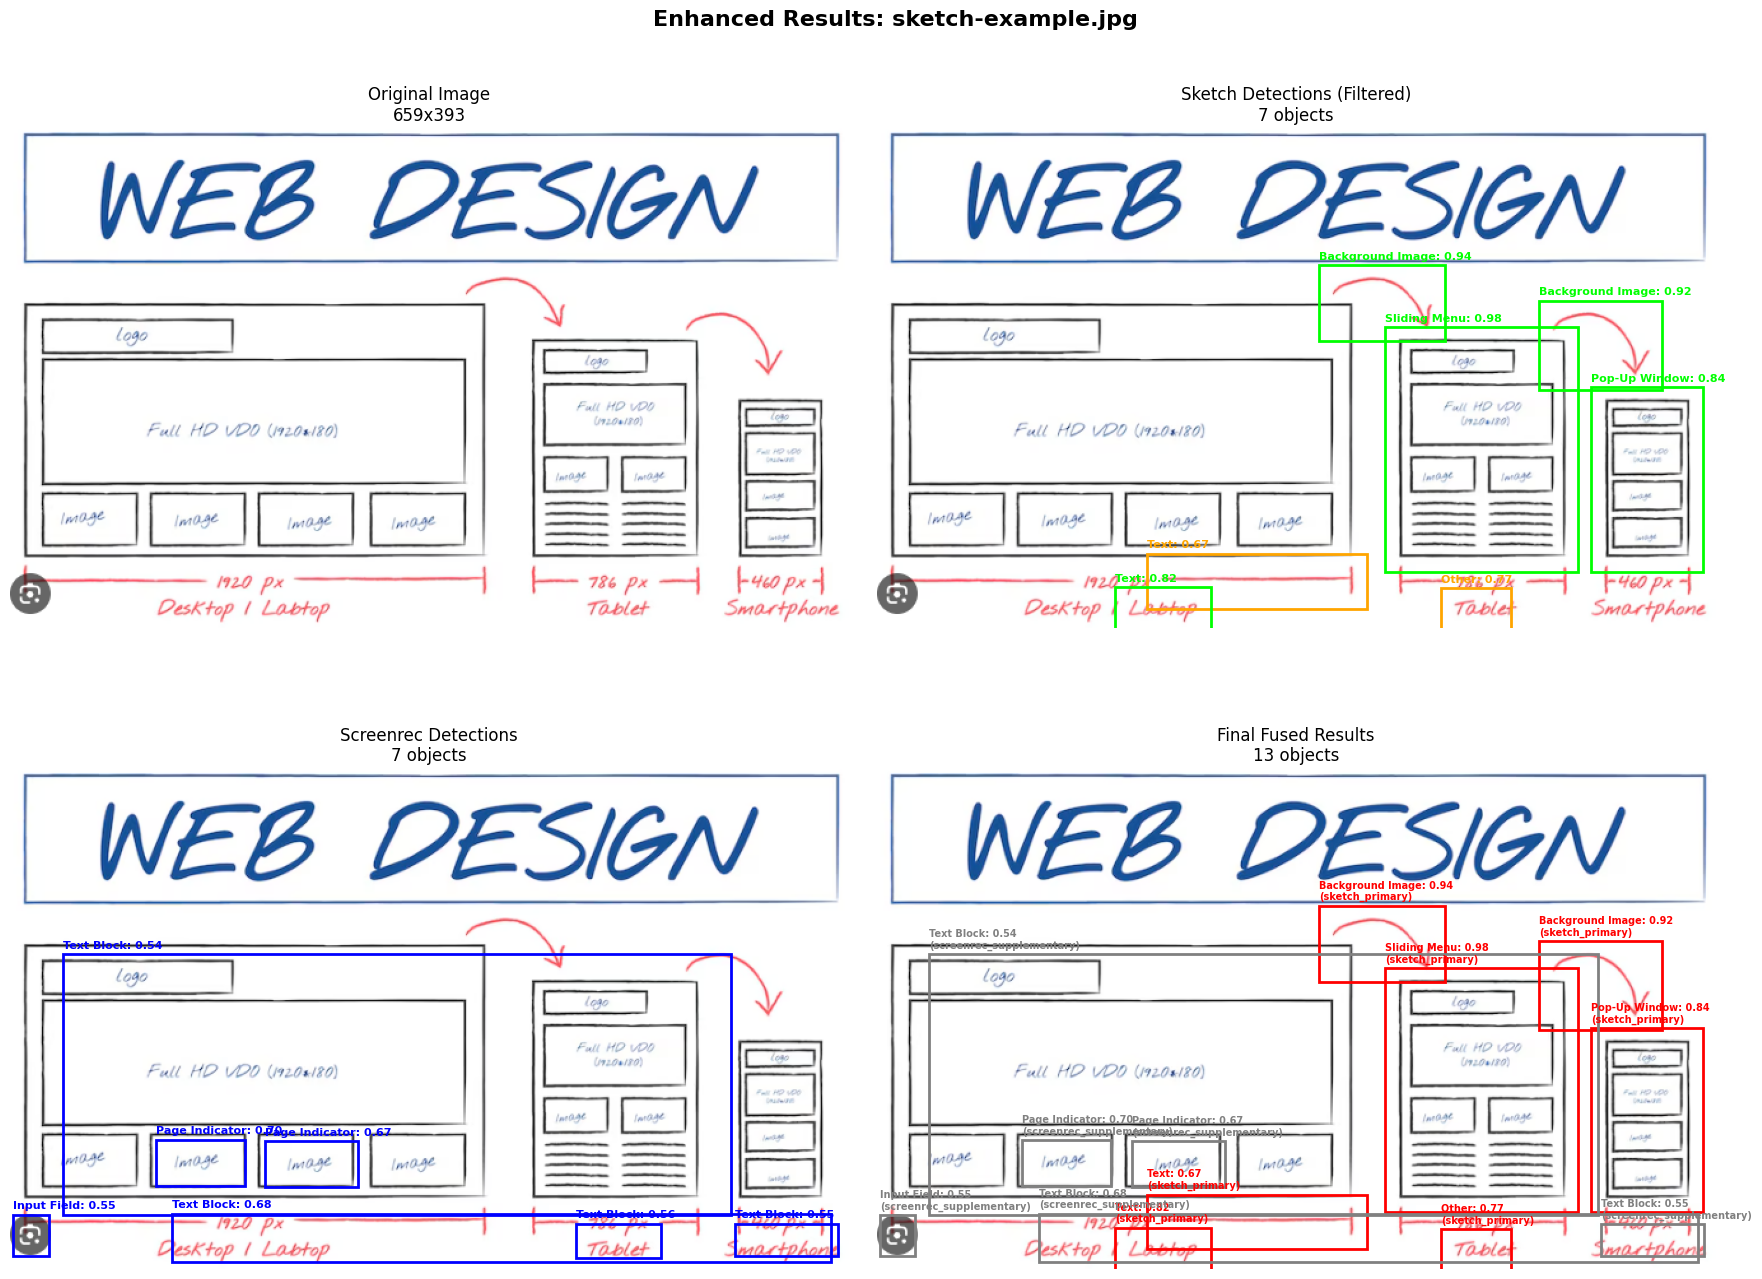


📊 Enhanced Detection Summary:
   🎯 Input type: quickdraw
   🎨 Sketch detections (filtered): 7
   🖥️ Screenrec detections: 7
   🔀 Final fused results: 13

📈 Filtering Statistics:
   • Raw sketch detections: 8
   • After filtering: 7
   • Reduction: 1
   • Reduction percentage: 12.5%

🔀 Fusion Breakdown:
   • sketch_primary: 7
   • screenrec_supplementary: 6

🔄 Testing without fragment filtering for comparison...
🧠 Enhanced Smart Processing: c:\Users\NACHIKET\Desktop\SketchReal\examples\sample_images\sketch-example.jpg
Parameters: input_type=None, sketch_conf=0.4, screenrec_conf=0.5
Advanced filtering: fragment_filtering=False
Image shape: (393, 659, 3)
🎯 Detected input type: quickdraw
🖥️ Step 1: Screenrecognition detection...
   Found 10 UI elements
   Merging text elements...
   Final screenrec detections: 7
🎨 Step 2: Enhanced sketch detection + filtering...
   Raw sketch detections: 8
🧠 Step 3: Smart fusion (quickdraw mode, strict=True)...
   Final results: 14 objects
✅ Comparison te

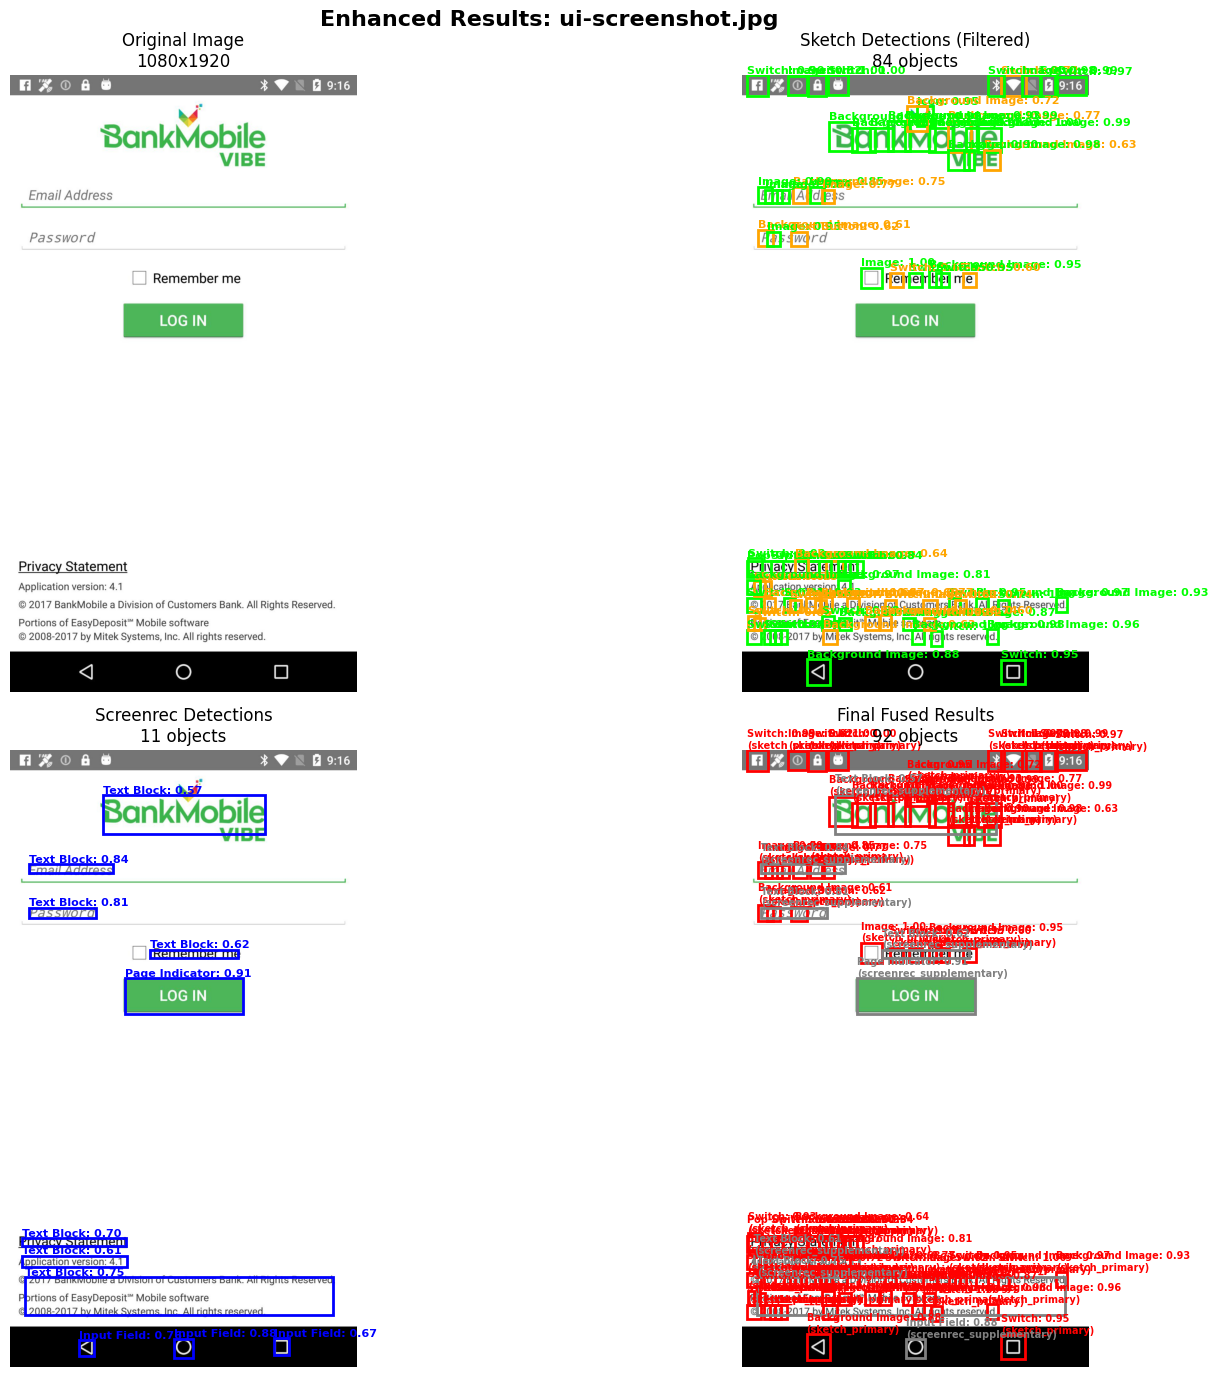


📊 Enhanced Detection Summary:
   🎯 Input type: quickdraw
   🎨 Sketch detections (filtered): 84
   🖥️ Screenrec detections: 11
   🔀 Final fused results: 92

📈 Filtering Statistics:
   • Raw sketch detections: 118
   • After filtering: 84
   • Reduction: 34
   • Reduction percentage: 28.8%

🔀 Fusion Breakdown:
   • sketch_primary: 84
   • screenrec_supplementary: 8

🔄 Testing without fragment filtering for comparison...
🧠 Enhanced Smart Processing: c:\Users\NACHIKET\Desktop\SketchReal\examples\sample_images\ui-screenshot.jpg
Parameters: input_type=None, sketch_conf=0.4, screenrec_conf=0.5
Advanced filtering: fragment_filtering=False
Image shape: (1920, 1080, 3)
🎯 Detected input type: quickdraw
🖥️ Step 1: Screenrecognition detection...
   Found 12 UI elements
   Merging text elements...
   Final screenrec detections: 11
🎨 Step 2: Enhanced sketch detection + filtering...
   Raw sketch detections: 118
🧠 Step 3: Smart fusion (quickdraw mode, strict=True)...
   Final results: 125 objects
✅ C

In [10]:

# Test the enhanced inference pipeline
if smart_system and sample_images and hasattr(smart_system, 'inference_pipeline'):
    print("\n🚀 Testing Enhanced Inference Pipeline...")
    
    for img_name in sample_images[:2]:  # Test first 2 images
        image_path = os.path.join(sample_images_dir, img_name)
        print(f"\n🖼️ Processing: {img_name}")
        print("=" * 50)
        
        try:
            # Test with enhanced filtering enabled
            results = smart_system.inference_pipeline(
                image_path=image_path,
                input_type=None,  # Auto-detect
                sketch_conf=0.4,
                screenrec_conf=0.5,
                iou_threshold=0.3,
                strict_ui_mode=True,
                enable_fragment_filtering=True  # This should work now!
            )
            
            print("✅ Enhanced inference successful!")
            
            # Visualize results
            visualize_detections(image_path, results, f"Enhanced Results: {img_name}")
            
            # Test with fragment filtering disabled for comparison
            print(f"\n🔄 Testing without fragment filtering for comparison...")
            results_no_filter = smart_system.inference_pipeline(
                image_path=image_path,
                input_type=None,
                sketch_conf=0.4,
                screenrec_conf=0.5,
                enable_fragment_filtering=False
            )
            
            print("✅ Comparison test successful!")
            
            # Show comparison
            sketch_with_filter = len(results.get('sketch_detections', []))
            sketch_without_filter = len(results_no_filter.get('sketch_detections', []))
            
            print(f"\n📊 Filtering Comparison for {img_name}:")
            print(f"   • With filtering: {sketch_with_filter} sketch detections")
            print(f"   • Without filtering: {sketch_without_filter} sketch detections")
            print(f"   • Reduction: {sketch_without_filter - sketch_with_filter} detections")
            
            if sketch_without_filter > 0:
                reduction_pct = ((sketch_without_filter - sketch_with_filter) / sketch_without_filter) * 100
                print(f"   • Reduction percentage: {reduction_pct:.1f}%")
            
            print("-" * 50)
            
        except Exception as e:
            print(f"❌ Inference failed for {img_name}: {e}")
            print(f"Error details: {traceback.format_exc()}")
            
            # Show original image anyway
            try:
                image = cv2.imread(image_path)
                if image is not None:
                    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
                    plt.figure(figsize=(8, 6))
                    plt.imshow(image_rgb)
                    plt.title(f"Original Image: {img_name} (Inference Failed)")
                    plt.axis('off')
                    plt.show()
            except Exception as viz_e:
                print(f"❌ Could not display image: {viz_e}")

else:
    print("❌ Cannot test inference pipeline:")
    if not smart_system:
        print("   • Smart system not initialized")
    elif not hasattr(smart_system, 'inference_pipeline'):
        print("   • inference_pipeline method not available")
    elif not sample_images:
        print("   • No sample images available")
        print("   • Please add test images to examples/sample_images/")
    
    print("\n💡 To test the system:")
    print("   1. Add sample images (UI screenshots or sketches) to examples/sample_images/")
    print("   2. Ensure both models are available (unified_model.h5 and screenrecognition.torchscript)")
    print("   3. Re-run this cell")

In [9]:
print(f"🔍 Looking for sample images in: {sample_images_dir}")

if os.path.exists(sample_images_dir):
    sample_images = [f for f in os.listdir(sample_images_dir) 
                    if f.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.tiff'))]
    
    if sample_images:
        print(f"✅ Found {len(sample_images)} sample images:")
        for i, img in enumerate(sample_images[:5], 1):
            img_path = os.path.join(sample_images_dir, img)
            try:
                img_size = os.path.getsize(img_path)
                print(f"   {i}. {img} ({img_size/1024:.1f} KB)")
            except:
                print(f"   {i}. {img} (size unknown)")
        
        if len(sample_images) > 5:
            print(f"   ... and {len(sample_images) - 5} more")
    else:
        print("❌ No sample images found")
        sample_images = []
else:
    print("❌ Sample images directory not found")
    sample_images = []

print(f"\n📁 Total sample images available: {len(sample_images)}")


🔍 Looking for sample images in: c:\Users\NACHIKET\Desktop\SketchReal\examples\sample_images
✅ Found 2 sample images:
   1. sketch-example.jpg (163.8 KB)
   2. ui-screenshot.jpg (96.7 KB)

📁 Total sample images available: 2


In [8]:
print("\n🔧 Testing individual components...")

# Test input type detection
try:
    test_img = np.ones((300, 300, 3), dtype=np.uint8) * 255
    cv2.rectangle(test_img, (50, 50), (250, 200), (0, 0, 0), 2)
    
    input_type = smart_system.detect_input_type(test_img)
    print(f"✅ Input type detection works: {input_type}")

except Exception as e:
    print(f"❌ Input type detection failed: {e}")

# Test text merging
try:
    test_detections = [
        {'bbox': [10, 10, 50, 30], 'class_name': 'Text', 'confidence': 0.8},
        {'bbox': [55, 10, 100, 30], 'class_name': 'Text', 'confidence': 0.7}
    ]
    merged = smart_system.merge_text_elements(test_detections)
    print(f"✅ Text merging works: {len(test_detections)} -> {len(merged)}")

except Exception as e:
    print(f"❌ Text merging failed: {e}")

# Test IoU computation
try:
    iou = smart_system.compute_iou([10, 10, 20, 20], [15, 15, 25, 25])
    print(f"✅ IoU computation works: {iou:.3f}")

except Exception as e:
    print(f"❌ IoU computation failed: {e}")

print("\n✅ Component testing completed!")



🔧 Testing individual components...
✅ Input type detection works: InputType.QUICKDRAW
✅ Text merging works: 2 -> 1
✅ IoU computation works: 0.143

✅ Component testing completed!
